<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>SHOPPER SENTIMENTS ANALYSIS
</strong></h1>
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Import Necessary Libraries</strong></h1>
</div>

In [34]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Importing the Dataset</strong></h1>
</div>


In [35]:
file_path = r"F:\Experiences\02-CognoRise InfoTech-DS-Internship\Datasets\07-TeePublic_review.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')  # Or use 'latin1' as the encoding

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Explore the Basics of The Dataset</strong></h1>
</div>

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278100 entries, 0 to 278099
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   reviewer_id     278099 non-null  float64
 1   store_location  278100 non-null  object 
 2   latitude        278100 non-null  float64
 3   longitude       278100 non-null  float64
 4   date            278100 non-null  int64  
 5   month           278100 non-null  int64  
 6   year            278100 non-null  object 
 7   title           278088 non-null  object 
 8   review          247597 non-null  object 
 9   review-label    278100 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 21.2+ MB


In [37]:
df.describe()

,reviewer_id,latitude,longitude,date,month,review-label
count,278099.000000,278100.000000,278100.000000,278100.000000,278100.000000,278100.000000
mean,139049.000000,37.189516,-88.182471,2020.889518,7.195329,4.409730
std,80280.410593,10.217722,37.028084,1.390760,3.678214,1.178112
min,0.000000,-40.900557,-172.104629,2018.000000,1.000000,1.000000
25%,69524.500000,37.090240,-95.712891,2020.000000,4.000000,4.000000
50%,139049.000000,37.090240,-95.712891,2021.000000,7.000000,5.000000
75%,208573.500000,37.090240,-95.712891,2022.000000,11.000000,5.000000
max,278098.000000,64.963051,174.885971,2023.000000,12.000000,5.000000


In [38]:
df.isnull().sum()

reviewer_id           1
store_location        0
latitude              0
longitude             0
date                  0
month                 0
year                  0
title                12
review            30503
review-label          0
dtype: int64

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Handling Missing Values</strong></h1> </div>

In [39]:
# Dropping rows with missing reviews
df = df.dropna(subset=['review'])

In [40]:
df.isnull().sum()

reviewer_id       1
store_location    0
latitude          0
longitude         0
date              0
month             0
year              0
title             9
review            0
review-label      0
dtype: int64

In [41]:
row, col =df.shape
print(f'Number of rows in Dataset: {row} and Number of Columns: {col}' )

Number of rows in Dataset: 247597 and Number of Columns: 10


In [42]:
df.head()

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
0,0.0,US,37.090240,-95.712891,2023,6,2015 00:00:00,Great help with lost order,I had an order that was lost in transit. When ...,5
1,1.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,I ordered the wrong size tee and hadï¿½ï¿½ï¿½,I ordered the wrong size tee and had difficult...,5
2,2.0,US,37.090240,-95.712891,2023,6,2017 00:00:00,These guys offer the best customerï¿½ï¿½ï¿½,These guys offer the best customer service in ...,5
3,3.0,US,37.090240,-95.712891,2023,6,2024 00:00:00,Good Stuff,Looked for an obscure phrase on a shirt. Teepu...,5
4,4.0,CA,56.130366,-106.346771,2023,6,2023 00:00:00,My order arrived in a good timelyï¿½ï¿½ï¿½,My order arrived in a good timely fashion & th...,4


In [43]:
df.sample(5)

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label
27275,27275.0,AU,-25.274398,133.775136,2023,1,2004 00:00:00,Disappointed,I was expecting cotton T-shirts ï¿½ï¿½ï¿½ï¿½ï¿...,2
146168,146168.0,GB,54.787715,-6.492314,2021,8,2007 00:00:00,Love it!,"Excellent choice of designs, great, fast deliv...",5
160917,160917.0,US,37.090240,-95.712891,2021,2,2006 00:00:00,Sizes run small,Sizes run small.They sent another in the same ...,4
220483,220483.0,US,37.090240,-95.712891,2020,2,2003 00:00:00,I have bought this shirt TWICE,I have bought this shirt TWICE.The first time ...,2
50453,50453.0,CA,56.130366,-106.346771,2022,11,2009 00:00:00,Offered smaller tshirt without cost orï¿½ï¿½ï¿½,Offered smaller tshirt without cost or hassle thx,5


In [44]:
df.columns

Index(['reviewer_id', 'store_location', 'latitude', 'longitude', 'date',
       'month', 'year', 'title', 'review', 'review-label'],
      dtype='object')

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Finding the Duplicate in The Dataset</strong></h1>
</div>

In [45]:
df[df.duplicated()]

,reviewer_id,store_location,latitude,longitude,date,month,year,title,review,review-label


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>Exploratory Data Analysis (EDA)</strong></h1>
</div>


<div style="text-align: center;"> <h1 style="font-size: 26px;"><strong>Geospatial Analysis: Reviews by Location</strong></h1> </div>

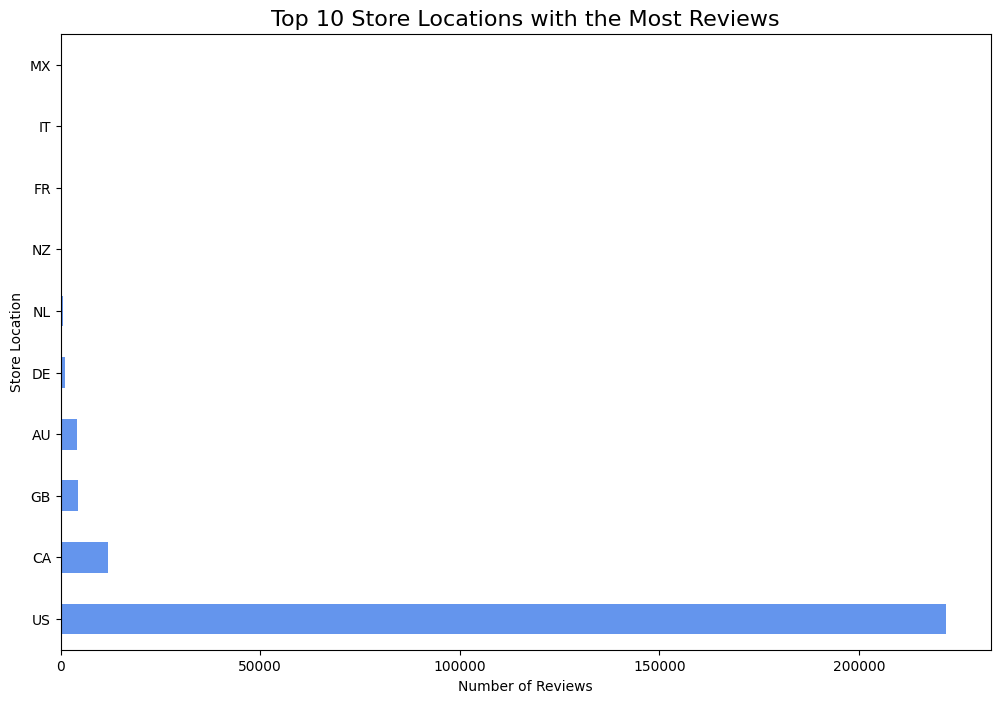

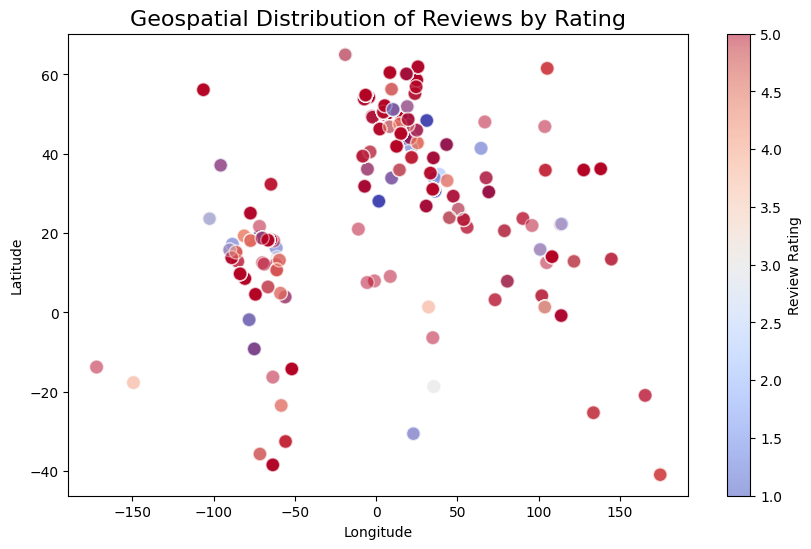

In [46]:
# Grouping by store location to visualize the number of reviews by location
location_reviews = df['store_location'].value_counts()

# Plotting the top 10 store locations with the highest number of reviews
plt.figure(figsize=(12, 8))
location_reviews[:10].plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Store Locations with the Most Reviews', fontsize=16)
plt.xlabel('Number of Reviews')
plt.ylabel('Store Location')
plt.show()

# Plotting latitude and longitude of the reviews
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.5, edgecolors='w', s=100, c=df['review-label'], cmap='coolwarm')
plt.colorbar(label='Review Rating')
plt.title('Geospatial Distribution of Reviews by Rating', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>3D Scatter plot with geospatial data (latitude, longitude) and review labels</strong></h1> </div>

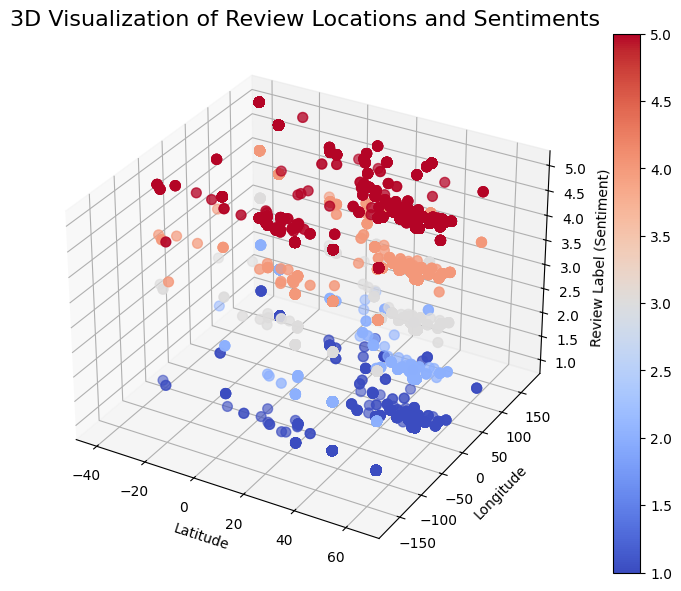

In [47]:
# 3D Scatter Plot of Review Locations (Latitude, Longitude, and Sentiments)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with geospatial data (latitude, longitude) and review labels
sc = ax.scatter(df['latitude'], df['longitude'], df['review-label'], c=df['review-label'], cmap='coolwarm', s=50)
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Review Label (Sentiment)')
plt.title('3D Visualization of Review Locations and Sentiments', fontsize=16)
plt.colorbar(sc)
plt.show()

Bar Plot of Reviews by Year

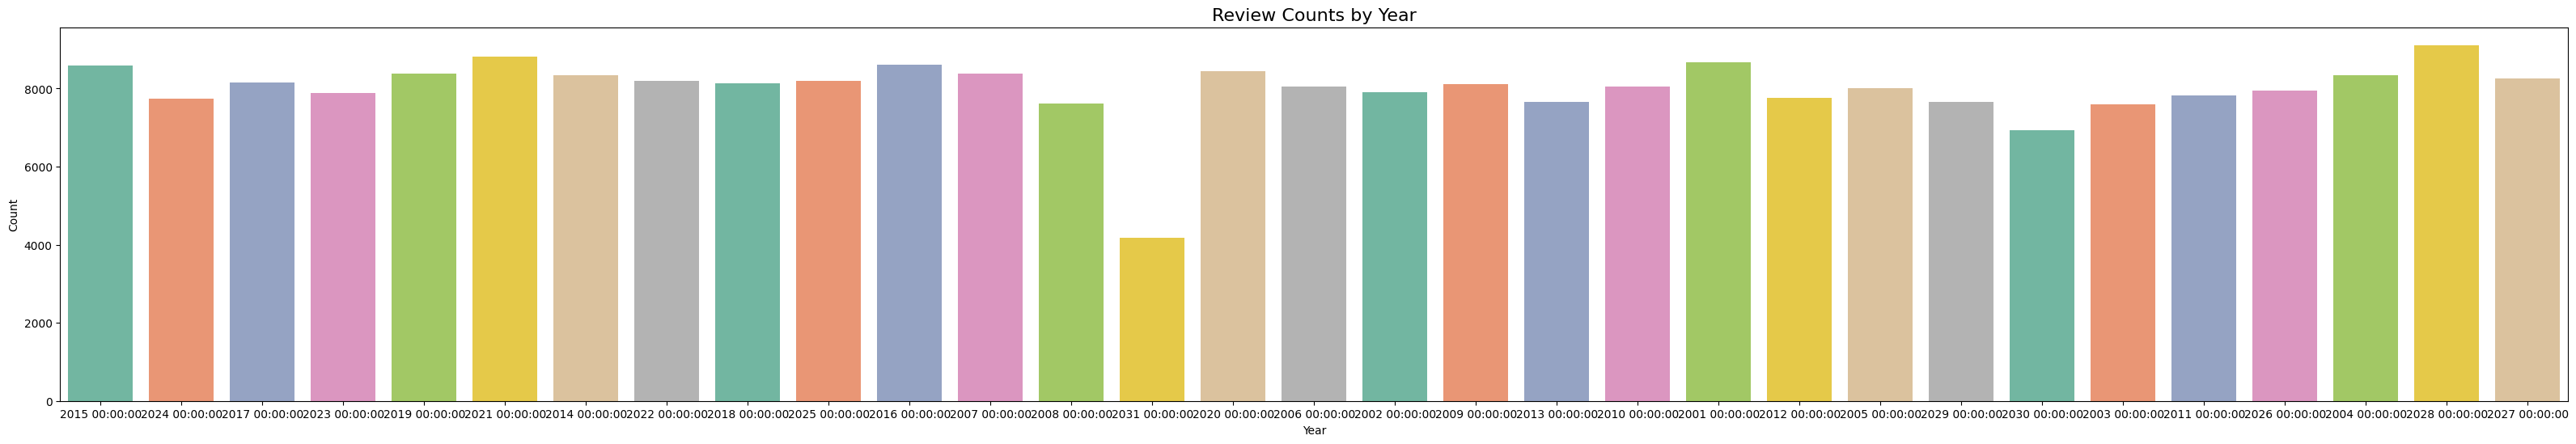

In [48]:
# Bar Plot of Reviews by Year
plt.figure(figsize=(40, 6))
sns.countplot(x='year', data=df, palette='Set2')
plt.title('Review Counts by Year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Temporal Analysis: Reviews Over Time</strong></h1> </div>

[2023 2022 2021 2020 2019 2018]
Rows with missing or invalid dates: 
Empty DataFrame
Columns: [reviewer_id, store_location, latitude, longitude, date, month, year, title, review, review-label]
Index: []


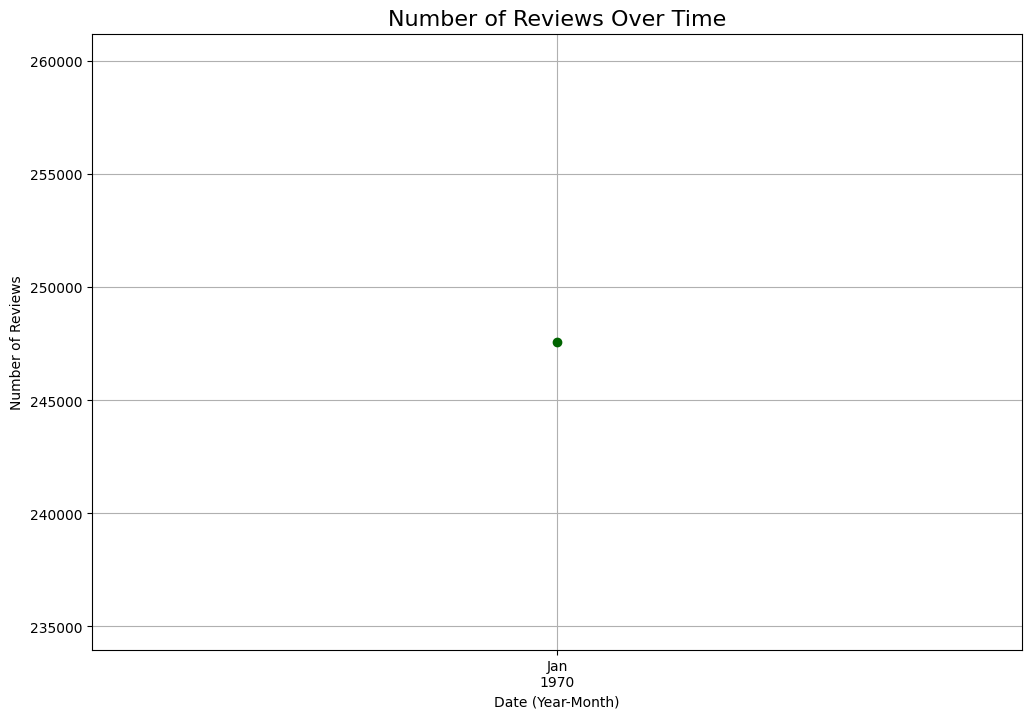

In [49]:
# Inspect the unique values in the 'date' column to check for inconsistent formats
print(df['date'].unique())

# Converting 'date' to datetime format for temporal analysis with flexible parsing
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if any dates were not parsed correctly (i.e., became NaT)
missing_dates = df[df['date'].isna()]
print(f"Rows with missing or invalid dates: \n{missing_dates}")

# Now, extract year and month from the date (for rows with valid dates)
df['year_month'] = df['date'].dt.to_period('M')

# Visualizing the trend of reviews over time
plt.figure(figsize=(12, 8))
df.groupby('year_month').size().plot(kind='line', marker='o', color='darkgreen')
plt.title('Number of Reviews Over Time', fontsize=16)
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Text Analysis: Most Frequent Words in Reviews</strong></h1> </div>

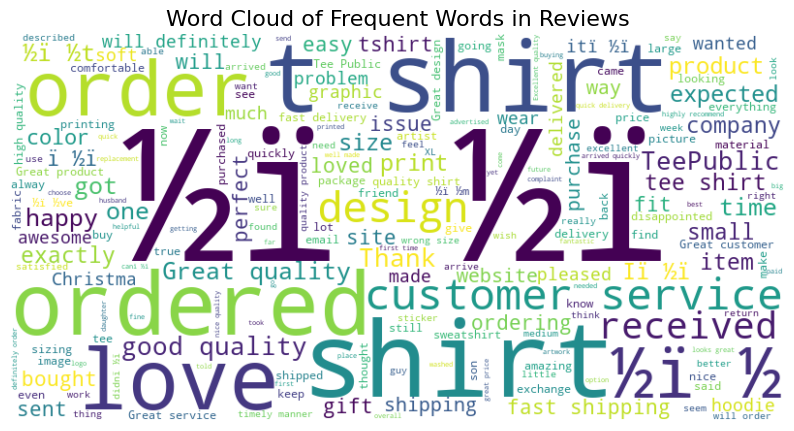

In [50]:
# Concatenate all reviews into one large text for word cloud visualization
reviews_text = ' '.join(df['review'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Frequent Words in Reviews', fontsize=16)
plt.show()


<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>1. Building a Naive Bayes classification model</strong></h1> </div>

Accuracy: 0.9060985460420032
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.57      0.68      8722
           1       0.91      0.98      0.94     40798

    accuracy                           0.91     49520
   macro avg       0.88      0.77      0.81     49520
weighted avg       0.90      0.91      0.90     49520



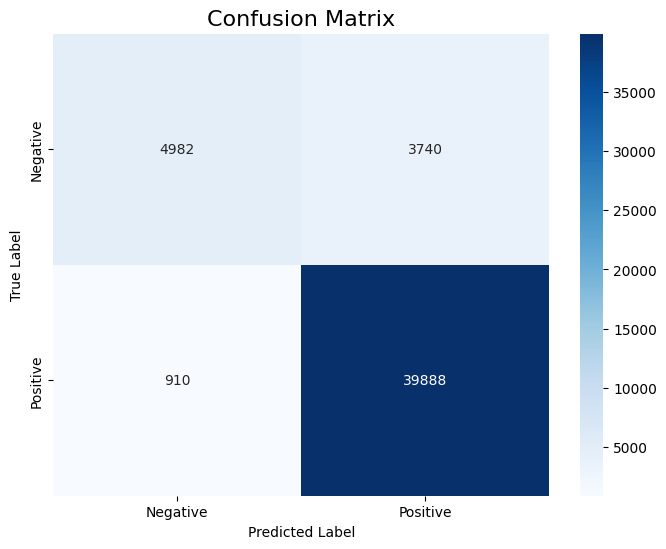

              precision    recall  f1-score   support

           0       0.85      0.57      0.68      8722
           1       0.91      0.98      0.94     40798

    accuracy                           0.91     49520
   macro avg       0.88      0.77      0.81     49520
weighted avg       0.90      0.91      0.90     49520



In [52]:
# Convert the review-label to binary sentiment: 1 for positive (4-5 rating), 0 for negative (1-3 rating)
df['sentiment'] = df['review-label'].apply(lambda x: 1 if x >= 4 else 0)

# Splitting the dataset into features (X) and target (y)
X = df['review']
y = df['sentiment']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Building a Naive Bayes classification model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predicting on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Evaluating the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
# Classification Report
print(classification_report(y_test, y_pred))

<div style="text-align: center;"> <h1 style="font-size: 36px;"><strong>Building  RandomForestClassifier</strong></h1> </div>

              precision    recall  f1-score   support

           1       0.13      0.00      0.00      3366
           2       0.11      0.00      0.00      2160
           3       0.00      0.00      0.00      3196
           4       0.09      0.00      0.00      4578
           5       0.73      1.00      0.84     36220

    accuracy                           0.73     49520
   macro avg       0.21      0.20      0.17     49520
weighted avg       0.56      0.73      0.62     49520



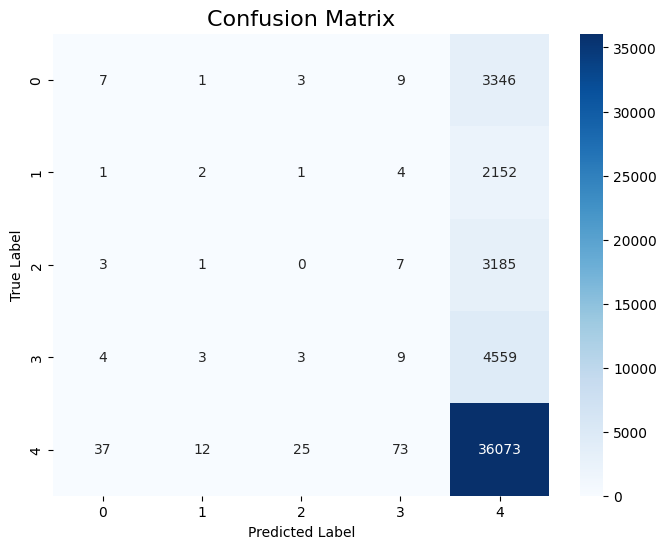

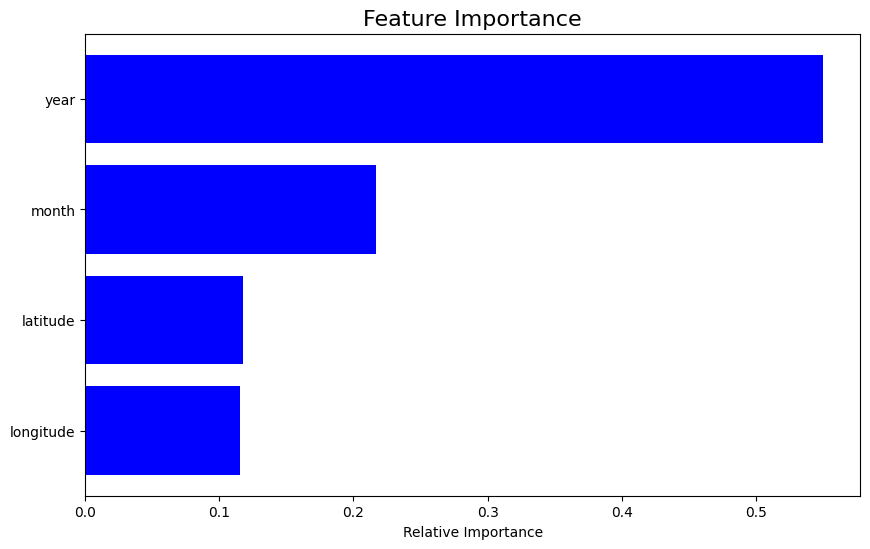

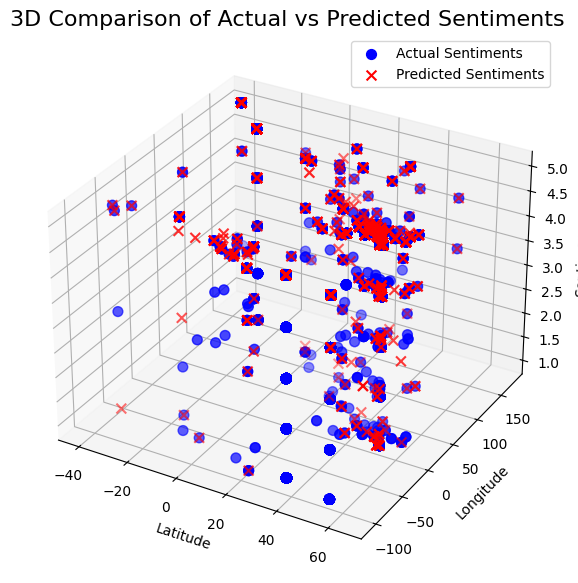

In [53]:
# Fixing the 'year' column by extracting only the year part
# Removing any invalid time or other text in 'year'
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')

# Now, convert the cleaned 'year' column to integer
df['year'] = df['year'].astype(int)

# Now proceed with the rest of the code
X = df[['latitude', 'longitude', 'month', 'year']]
y = df['review-label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the RandomForest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[-4:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importance', fontsize=16)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 3D Plot of Actual vs Predicted Sentiments (Post Model)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test['latitude'], X_test['longitude'], y_test, c='b', label='Actual Sentiments', marker='o', s=50)
ax.scatter(X_test['latitude'], X_test['longitude'], y_pred, c='r', label='Predicted Sentiments', marker='x', s=50)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Sentiments')

plt.title('3D Comparison of Actual vs Predicted Sentiments', fontsize=16)
plt.legend()
plt.show()


<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong> Study Conclusion</strong></h1>
</div>


<div >
    <h1 style="font-size: 16px;"><strong>The Naive Bayes model performed well in predicting shopper sentiments, achieving an accuracy of 90.6%. The model demonstrated strong performance in identifying positive sentiments, with a high precision of 91% and recall of 98% for positive reviews (class 1). However, it showed relatively lower performance in classifying negative sentiments (class 0), with a precision of 85% and a recall of 57%, suggesting room for improvement in handling negative feedback.

Overall, the model effectively captured key patterns in the data, making it useful for sentiment analysis. However, further tuning and feature engineering may enhance its ability to predict negative sentiments more accurately.
</div>

<div style="text-align: center;">
    <h1 style="font-size: 36px;"><strong>The End</strong></h1>
</div>

<!-- 
#MuhammadAdeel 
#DataScientist 
#DataScienceEnthusiast 
#MPhilDataScience 
#Python 
#DataAnalysis 
#MachineLearning 
#Multan 
#Pakistan 
#GitHub 
#LinkedIn
#EDA
#cirrhossis
#datacleaning
-->